In [131]:
%pylab inline
import pandas, pickle

tableau20 = pickle.load(open("tableau20.colors","rb"))

rcParams["lines.linewidth"] = 3
rcParams["axes.grid"] = True
rcParams["figure.figsize"] = (12,8)
rcParams["axes.color_cycle"] = tableau20

Populating the interactive namespace from numpy and matplotlib


In [170]:
df = pandas.read_csv("trades_2014_07_30.csv")
df["price"] = map(lambda x: float(x), df["price"])
df["size"] = map(lambda x: float(x), df["size"])
df["time"] = map(lambda x: float(x[11:-1][:2])*3600.0 + float(x[11:-1][3:5])*60.0 + float(x[11:-1][6:]), df["time"])
df["side_numerical"] = map(lambda x: 1 if x == "sell" else -1, df["side"])
df["uptick"] = (df["price"] > df["price"].shift(1))
df["downtick"] = (df["price"] < df["price"].shift(1))
df["uptick"] = map(lambda x: 1.0 if x else 0.0, df["uptick"])
df["downtick"] = map(lambda x: -1.0 if x else 0.0, df["downtick"])

In [171]:
df["price"].pct_change()[1:].autocorr()

-0.10911692411506316

In [172]:
idx = df["side"].loc[df["side"] == "buy"].index + 1
afterbuy = df["side"].iloc[idx[idx < df["side"].count()]]
1. * afterbuy.loc[afterbuy == "sell"].count() / afterbuy.count()

0.5238095238095238

In [173]:
idx = df["side"].loc[df["side"] == "sell"].index + 1
aftersell = df["side"].iloc[idx[idx < df["side"].count()]]
1. * aftersell.loc[aftersell == "buy"].count() / aftersell.count()

0.0860655737704918

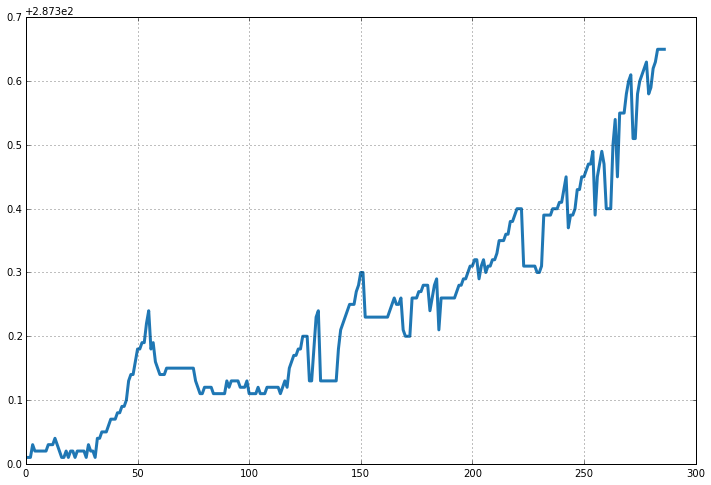

In [193]:
plot(df["price"])
#plot(df["price"], "o");
#plot(pandas.stats.moments.rolling_mean(df["price"],window=10));
#xlim(50,100);

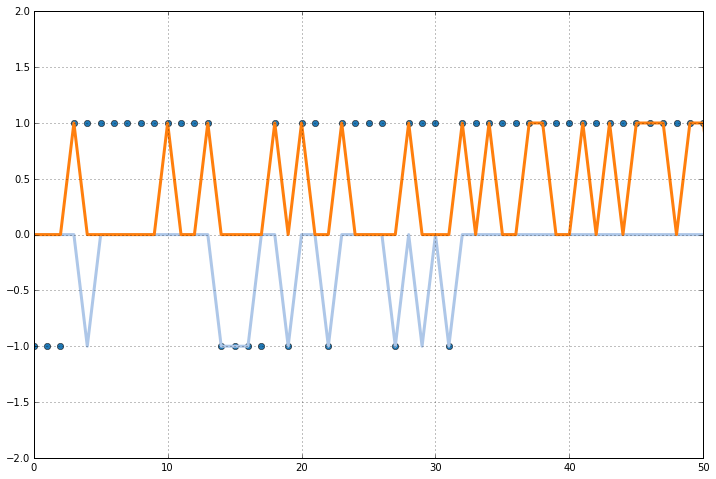

In [180]:
plot(df["side_numerical"], "o")
#plot(pow(10,4)*df["price"].pct_change())
plot(df["downtick"])
plot(df["uptick"])
ylim(-2.0,2.0);
xlim(0,50);